In [ ]:
#Elif Nur Halat
#180205001
#Normal Öğretim

In [ ]:
import sys
sys.path.insert(0, 'drive/DerinOgrenme')

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [1]:
#1-Problem türü belirlendikten sonra girdiler ve çıktı veya çıktıları belirleyiniz.
#Problem veri setinin ilk 7 sütunundaki verileri inceleyerek pirinç türünün tahmin edilmesidir. Bu bir ikili sınıflandırma problemidir.
#Girdiler veri setinin ilk 7 sütunudur ve çıktı ise 8. sütun olan son sütun yani pirincin türünün Cammeo mu Osmancık mı olduğudur. 

In [ ]:
veriseti=pd.read_csv("/content/drive/MyDrive/DerinOgrenme/data-1.csv",delimiter=",")
veriseti.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [ ]:
#2-Veriyi analiz ediniz, kategorik veri var ise nümerik hale getirin veriyi ölçekleyin.

In [ ]:
#İlk 7 sütun nümerik verilerden, 8. sütun  kategorik verilerden oluşur. Bu sütunu nümerik hale getirmeliyiz. 
#Binary sınıflandırma problemi olacağından 1 ve 0 olarak değiştirdim. 
veriseti["Class"]=veriseti["Class"].map({"Cammeo":0,"Osmancik":1})
veriseti.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,0
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,0
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,0
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,0
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,0


In [ ]:
veriseti.shape
#3810 satır 8 sütundan oluşur.

(3810, 8)

In [ ]:
missing=veriseti.isnull().sum()
missing
#veri setinde boş veri yok

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [ ]:
ozet=veriseti.describe()
ozet

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934,0.572178
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239,0.494828
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413,0.000000
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862,0.000000
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361,1.000000
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562,1.000000
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050,1.000000


In [ ]:
#Veri setini girdi ve çıktılara ayırdım.
x=veriseti.drop("Class",axis=1)
x.head()


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024


In [ ]:
y=veriseti["Class"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
from sklearn import preprocessing
#Veri setinde ölçeklendirme yaptım.
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(x)
x_ = pd.DataFrame(scaled)

In [ ]:
x_.head()

,0,1,2,3,4,5,6
0,1.479830,2.004354,2.348547,-0.212943,2.018337,1.499659,-1.152921
1,1.147870,1.125853,0.988390,0.945568,0.410018,1.192918,-0.602079
2,1.135169,1.317214,1.451908,0.253887,1.212956,1.126504,0.405611
3,0.293436,0.115300,0.261439,0.198051,0.239751,0.233857,-0.275351
4,1.166345,1.487053,1.316442,0.523419,0.952221,1.299855,-0.206013


In [ ]:
#3- Veriyi eğitim, doğrulama ve test olmak üzere 3’e ayırın.

In [ ]:
#veri setini test ve eğitim için ayırdım, doğrulama verisini eğitim başlarken ayıracağım.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_,y,test_size=0.2,random_state=10)

In [ ]:
#4- Yapay sinir ağı modelinizi oluşturun ve modelin özetini ekleyin.

In [ ]:
#Modeli oluşturdum. Modelde ara katmanlarda relu son katmanda ikili sınıflandırma olduğu için sigmoid aktivasyon fonksiyonunu  tercih ettim.
model = Sequential()
model.add(Dense(512, input_dim=7, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4096      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 398,593
Trainable params: 398,593
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#5- Modeli eğitin ve train Acc, val Acc, train loss, val loss grafiklerini çizdirin. 
#Modeliniz overfit oldu mu? Oldu ise ne gibi eklemeler yaptınız belirtin.

In [ ]:
#Hata fonksiyonu, ikili sınıflandırma oduğu için binary cross entropy olmalı.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train,Y_train,validation_split=0.1,epochs=200)

Epoch 1/200
86/86 [==============================] - 2s 11ms/step - loss: 0.2275 - accuracy: 0.9165 - val_loss: 0.1829 - val_accuracy: 0.9344
Epoch 2/200
86/86 [==============================] - 1s 8ms/step - loss: 0.1950 - accuracy: 0.9260 - val_loss: 0.1699 - val_accuracy: 0.9508
Epoch 3/200
86/86 [==============================] - 1s 9ms/step - loss: 0.1876 - accuracy: 0.9296 - val_loss: 0.1846 - val_accuracy: 0.9311
Epoch 4/200
86/86 [==============================] - 1s 8ms/step - loss: 0.1901 - accuracy: 0.9267 - val_loss: 0.1748 - val_accuracy: 0.9344
Epoch 5/200
86/86 [==============================] - 1s 8ms/step - loss: 0.1876 - accuracy: 0.9289 - val_loss: 0.1738 - val_accuracy: 0.9377
Epoch 6/200
86/86 [==============================] - 1s 9ms/step - loss: 0.1866 - accuracy: 0.9304 - val_loss: 0.1853 - val_accuracy: 0.9410
Epoch 7/200
86/86 [==============================] - 1s 8ms/step - loss: 0.1871 - accuracy: 0.9304 - val_loss: 0.1862 - val_accuracy: 0.9475
Epoch 8/200


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


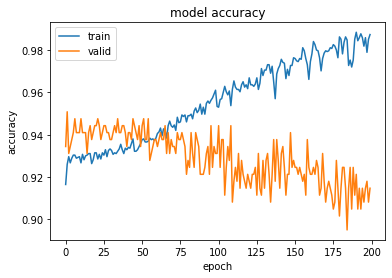

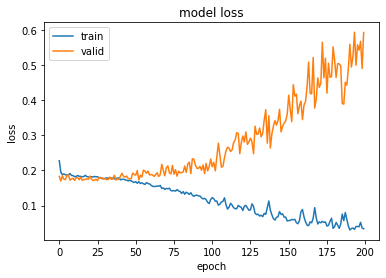

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(X_train,Y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,Y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

96/96 [==============================] - 0s 3ms/step - loss: 0.0846 - accuracy: 0.9813
Training Accuracy: 98.13%

24/24 [==============================] - 0s 3ms/step - loss: 0.9617 - accuracy: 0.8885
Testing Accuracy: 88.85%



In [ ]:
#Accuracy ve loss grafiklerinden modelin overfit olduğu anlaşılıyor.
#Validasyon ve eğitim arasında ciddi bir fark var ve validasyonda doğruluk daha düşük hata daha yüksek. Ayrıca test sonuçları eğitim sonuçlarında düşük.

In [ ]:
from keras.layers import Dropout
from keras import regularizers
# Modelin overfit olmasını önlemek için daha basit bir model tasarlıyorum, bazı nöronları çıkarttım. Dropout ve Regularization yöntemlerini uyguladım.
model = Sequential()
model.add(Dense(64, input_dim=7, activation='relu',kernel_regularizer=regularizers.l2(0.02)))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.02)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.02)))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.02)))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                512       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [ ]:
#Hata fonksiyonu, ikili sınıflandırma oduğu için binary cross entropy olmalı.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train,Y_train,validation_split=0.1,epochs=200,batch_size=128)

Epoch 1/200
22/22 [==============================] - 1s 15ms/step - loss: 3.2058 - accuracy: 0.5684 - val_loss: 2.8353 - val_accuracy: 0.8852
Epoch 2/200
22/22 [==============================] - 0s 4ms/step - loss: 2.6022 - accuracy: 0.7743 - val_loss: 2.2427 - val_accuracy: 0.9246
Epoch 3/200
22/22 [==============================] - 0s 6ms/step - loss: 2.0701 - accuracy: 0.8680 - val_loss: 1.7411 - val_accuracy: 0.9279
Epoch 4/200
22/22 [==============================] - 0s 4ms/step - loss: 1.6343 - accuracy: 0.9125 - val_loss: 1.3789 - val_accuracy: 0.9344
Epoch 5/200
22/22 [==============================] - 0s 5ms/step - loss: 1.3294 - accuracy: 0.9158 - val_loss: 1.1235 - val_accuracy: 0.9377
Epoch 6/200
22/22 [==============================] - 0s 5ms/step - loss: 1.1035 - accuracy: 0.9176 - val_loss: 0.9291 - val_accuracy: 0.9377
Epoch 7/200
22/22 [==============================] - 0s 5ms/step - loss: 0.9307 - accuracy: 0.9191 - val_loss: 0.7820 - val_accuracy: 0.9377
Epoch 8/200


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


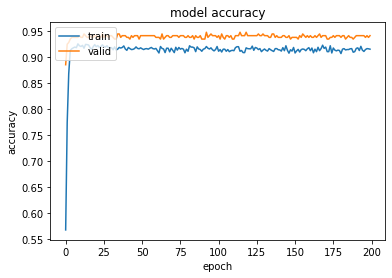

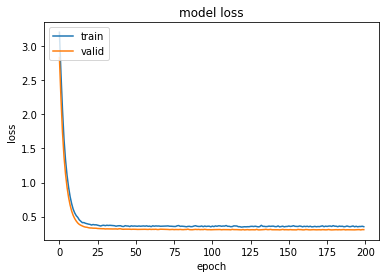

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(X_train,Y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,Y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

96/96 [==============================] - 0s 1ms/step - loss: 0.3209 - accuracy: 0.9272
Training Accuracy: 92.72%

24/24 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.9121
Testing Accuracy: 91.21%



In [ ]:
#Değerler birbirine yakın,  validasyon ve eğitim arasında fark azaldı. Test sonuçları ve eğitim sonuçları arasındaki fark da azaldı. Overfit engellenmiş oldu.

In [ ]:
#6- Modeli test edin, karmaşıklık matrisini gösterin, Accuracy, Sensitivity, Specificity, Precision, F1 score ölçütlerini hesaplayıp bir tablo halinde verin.

In [ ]:
pred=model.predict(X_test,batch_size=1,verbose=1)

762/762 [==============================] - 1s 1ms/step


[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 

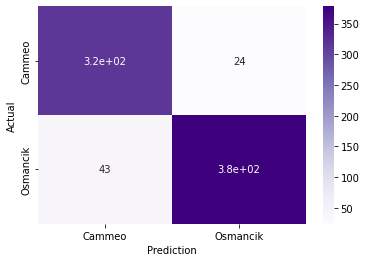

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred_test = model.predict(X_test)
y_pred=[]
for i in y_pred_test:
  if(i>=0.5):
    y_pred.append(1)
  else:
    y_pred.append(0)
print(y_pred)
cm = confusion_matrix(Y_test,y_pred)
ax = sns.heatmap(cm, annot=True, xticklabels=["Cammeo",'Osmancik'], yticklabels=['Cammeo','Osmancik'],
                cbar=True,cmap='Purples')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
(tn,fp,fn,tp)


(317, 24, 43, 378)

In [ ]:
Accuracy=(tp+tn)/(tp+tn+fp+fn)
Sensitivity=tp/(tp+fn)
Specificity=tn/(tn+fp)
Precision=tp/(tp+fp)
F1Score=2*((Precision*Sensitivity)/(Precision+Sensitivity))
table=[['Accuracy','Sensitivity','Specificity','Precision','F1Score'],[Accuracy,Sensitivity,Specificity,Precision,F1Score]]
df=pd.DataFrame(table)
df


,0,1,2,3,4
0,Accuracy,Sensitivity,Specificity,Precision,F1Score
1,0.912073,0.897862,0.929619,0.940299,0.918591


In [ ]:
#7- Deneme yanılmalar sonucu elde ettiğiniz modelinizi farklı optimizasyon algoritmaları deneyerek tekrar eğitin,
#validation loss ve validation accuracy grafiklerini tek bir görselde gösterin ve sonuçları yorumlayın aşağıdaki görselde örnek verilmiştir. 

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
history_Adamax=model.fit(X_train,Y_train,validation_split=0.1,epochs=200,batch_size=128)

Epoch 1/200
22/22 [==============================] - 1s 13ms/step - loss: 0.3559 - accuracy: 0.9103 - val_loss: 0.3068 - val_accuracy: 0.9344
Epoch 2/200
22/22 [==============================] - 0s 4ms/step - loss: 0.3637 - accuracy: 0.9103 - val_loss: 0.3073 - val_accuracy: 0.9377
Epoch 3/200
22/22 [==============================] - 0s 3ms/step - loss: 0.3527 - accuracy: 0.9180 - val_loss: 0.3070 - val_accuracy: 0.9344
Epoch 4/200
22/22 [==============================] - 0s 4ms/step - loss: 0.3612 - accuracy: 0.9092 - val_loss: 0.3066 - val_accuracy: 0.9377
Epoch 5/200
22/22 [==============================] - 0s 4ms/step - loss: 0.3544 - accuracy: 0.9187 - val_loss: 0.3061 - val_accuracy: 0.9410
Epoch 6/200
22/22 [==============================] - 0s 4ms/step - loss: 0.3497 - accuracy: 0.9136 - val_loss: 0.3059 - val_accuracy: 0.9377
Epoch 7/200
22/22 [==============================] - 0s 4ms/step - loss: 0.3559 - accuracy: 0.9129 - val_loss: 0.3063 - val_accuracy: 0.9410
Epoch 8/200


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


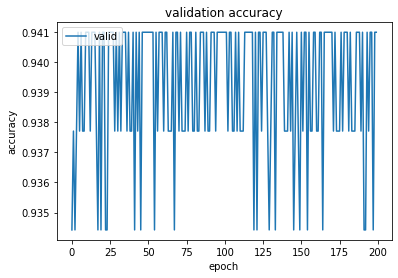

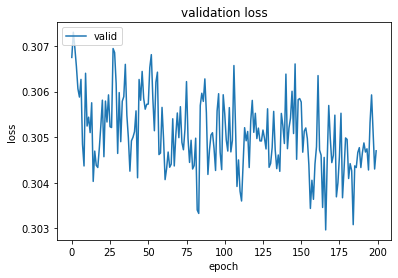

In [ ]:
import matplotlib.pyplot as plt

print(history_Adamax.history.keys())
# summarize history for accuracy
plt.plot(history_Adamax.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_Adamax.history['val_loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
history_SGD=model.fit(X_train,Y_train,validation_split=0.1,epochs=200,batch_size=128)

Epoch 1/200
22/22 [==============================] - 1s 12ms/step - loss: 0.3496 - accuracy: 0.9180 - val_loss: 0.3046 - val_accuracy: 0.9410
Epoch 2/200
22/22 [==============================] - 0s 4ms/step - loss: 0.3530 - accuracy: 0.9125 - val_loss: 0.3046 - val_accuracy: 0.9377
Epoch 3/200
22/22 [==============================] - 0s 4ms/step - loss: 0.3513 - accuracy: 0.9154 - val_loss: 0.3047 - val_accuracy: 0.9410
Epoch 4/200
22/22 [==============================] - 0s 3ms/step - loss: 0.3446 - accuracy: 0.9180 - val_loss: 0.3050 - val_accuracy: 0.9410
Epoch 5/200
22/22 [==============================] - 0s 4ms/step - loss: 0.3521 - accuracy: 0.9118 - val_loss: 0.3049 - val_accuracy: 0.9410
Epoch 6/200
22/22 [==============================] - 0s 4ms/step - loss: 0.3540 - accuracy: 0.9176 - val_loss: 0.3049 - val_accuracy: 0.9410
Epoch 7/200
22/22 [==============================] - 0s 4ms/step - loss: 0.3559 - accuracy: 0.9118 - val_loss: 0.3049 - val_accuracy: 0.9410
Epoch 8/200


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


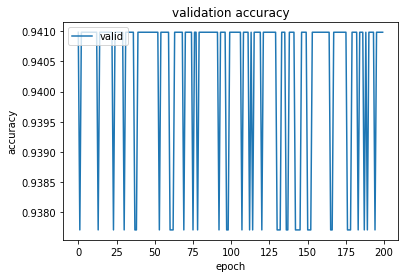

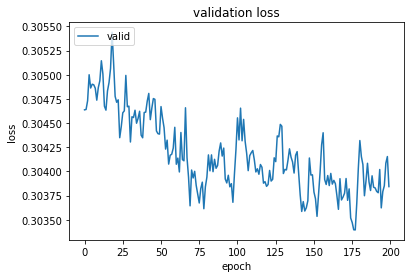

In [ ]:
import matplotlib.pyplot as plt

print(history_SGD.history.keys())
# summarize history for accuracy
plt.plot(history_SGD.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_SGD.history['val_loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
history_Adadelta=model.fit(X_train,Y_train,validation_split=0.1,epochs=200,batch_size=128)

Epoch 1/200
22/22 [==============================] - 1s 12ms/step - loss: 0.3494 - accuracy: 0.9110 - val_loss: 0.3038 - val_accuracy: 0.9410
Epoch 2/200
22/22 [==============================] - 0s 4ms/step - loss: 0.3591 - accuracy: 0.9089 - val_loss: 0.3038 - val_accuracy: 0.9410
Epoch 3/200
22/22 [==============================] - 0s 4ms/step - loss: 0.3512 - accuracy: 0.9092 - val_loss: 0.3038 - val_accuracy: 0.9410
Epoch 4/200
22/22 [==============================] - 0s 4ms/step - loss: 0.3527 - accuracy: 0.9191 - val_loss: 0.3038 - val_accuracy: 0.9410
Epoch 5/200
22/22 [==============================] - 0s 5ms/step - loss: 0.3482 - accuracy: 0.9205 - val_loss: 0.3038 - val_accuracy: 0.9410
Epoch 6/200
22/22 [==============================] - 0s 5ms/step - loss: 0.3519 - accuracy: 0.9092 - val_loss: 0.3038 - val_accuracy: 0.9410
Epoch 7/200
22/22 [==============================] - 0s 5ms/step - loss: 0.3559 - accuracy: 0.9096 - val_loss: 0.3038 - val_accuracy: 0.9410
Epoch 8/200


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


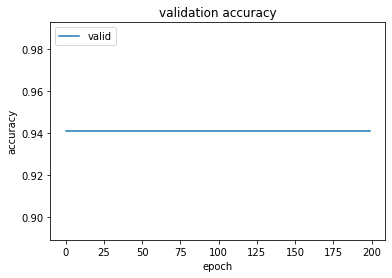

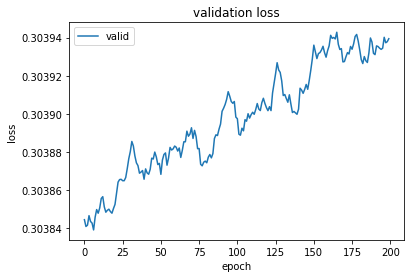

In [ ]:
import matplotlib.pyplot as plt

print(history_Adadelta.history.keys())
# summarize history for accuracy
plt.plot(history_Adadelta.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_Adadelta.history['val_loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
history_Adagrad=model.fit(X_train,Y_train,validation_split=0.1,epochs=200,batch_size=128)

Epoch 1/200
22/22 [==============================] - 1s 12ms/step - loss: 0.3480 - accuracy: 0.9180 - val_loss: 0.3040 - val_accuracy: 0.9410
Epoch 2/200
22/22 [==============================] - 0s 4ms/step - loss: 0.3517 - accuracy: 0.9154 - val_loss: 0.3039 - val_accuracy: 0.9410
Epoch 3/200
22/22 [==============================] - 0s 4ms/step - loss: 0.3427 - accuracy: 0.9191 - val_loss: 0.3038 - val_accuracy: 0.9410
Epoch 4/200
22/22 [==============================] - 0s 4ms/step - loss: 0.3537 - accuracy: 0.9154 - val_loss: 0.3038 - val_accuracy: 0.9410
Epoch 5/200
22/22 [==============================] - 0s 5ms/step - loss: 0.3565 - accuracy: 0.9118 - val_loss: 0.3038 - val_accuracy: 0.9410
Epoch 6/200
22/22 [==============================] - 0s 5ms/step - loss: 0.3530 - accuracy: 0.9078 - val_loss: 0.3038 - val_accuracy: 0.9410
Epoch 7/200
22/22 [==============================] - 0s 4ms/step - loss: 0.3559 - accuracy: 0.9118 - val_loss: 0.3039 - val_accuracy: 0.9410
Epoch 8/200


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


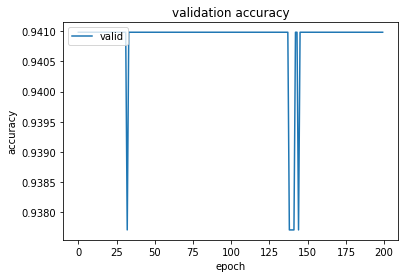

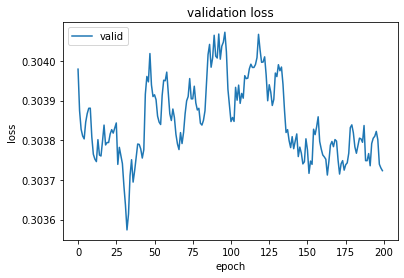

In [ ]:
import matplotlib.pyplot as plt

print(history_Adagrad.history.keys())
# summarize history for accuracy
plt.plot(history_Adagrad.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_Adagrad.history['val_loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Ftrl', metrics=['accuracy'])
history_Ftrl=model.fit(X_train,Y_train,validation_split=0.1,epochs=200,batch_size=128)

Epoch 1/200
22/22 [==============================] - 1s 13ms/step - loss: 0.6758 - accuracy: 0.5921 - val_loss: 0.6929 - val_accuracy: 0.5541
Epoch 2/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5797 - val_loss: 0.6928 - val_accuracy: 0.5541
Epoch 3/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5797 - val_loss: 0.6926 - val_accuracy: 0.5541
Epoch 4/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6923 - accuracy: 0.5797 - val_loss: 0.6925 - val_accuracy: 0.5541
Epoch 5/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.5797 - val_loss: 0.6925 - val_accuracy: 0.5541
Epoch 6/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.5797 - val_loss: 0.6924 - val_accuracy: 0.5541
Epoch 7/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.5797 - val_loss: 0.6923 - val_accuracy: 0.5541
Epoch 8/200


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


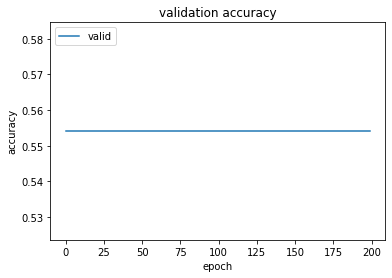

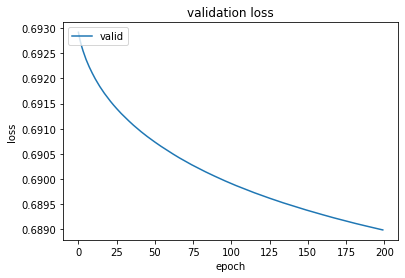

In [ ]:
import matplotlib.pyplot as plt

print(history_Ftrl.history.keys())
# summarize history for accuracy
plt.plot(history_Ftrl.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_Ftrl.history['val_loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])
history_Nadam=model.fit(X_train,Y_train,validation_split=0.1,epochs=200,batch_size=128)

Epoch 1/200
22/22 [==============================] - 2s 13ms/step - loss: 0.6861 - accuracy: 0.5797 - val_loss: 0.6886 - val_accuracy: 0.5541
Epoch 2/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6851 - accuracy: 0.5797 - val_loss: 0.6881 - val_accuracy: 0.5541
Epoch 3/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6841 - accuracy: 0.5797 - val_loss: 0.6878 - val_accuracy: 0.5541
Epoch 4/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6832 - accuracy: 0.5797 - val_loss: 0.6877 - val_accuracy: 0.5541
Epoch 5/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6826 - accuracy: 0.5797 - val_loss: 0.6877 - val_accuracy: 0.5541
Epoch 6/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6821 - accuracy: 0.5797 - val_loss: 0.6877 - val_accuracy: 0.5541
Epoch 7/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6818 - accuracy: 0.5797 - val_loss: 0.6879 - val_accuracy: 0.5541
Epoch 8/200


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


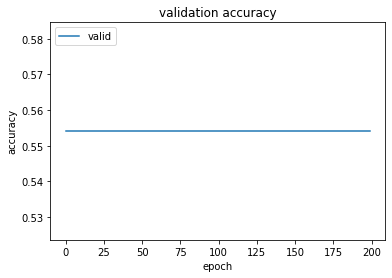

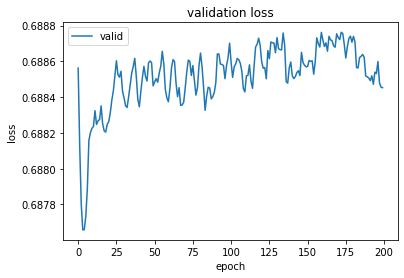

In [ ]:
import matplotlib.pyplot as plt

print(history_Nadam.history.keys())
# summarize history for accuracy
plt.plot(history_Nadam.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_Nadam.history['val_loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
history_RMSprop=model.fit(X_train,Y_train,validation_split=0.1,epochs=200,batch_size=128)

Epoch 1/200
22/22 [==============================] - 1s 13ms/step - loss: 0.6805 - accuracy: 0.5797 - val_loss: 0.6886 - val_accuracy: 0.5541
Epoch 2/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6805 - accuracy: 0.5797 - val_loss: 0.6887 - val_accuracy: 0.5541
Epoch 3/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6805 - accuracy: 0.5797 - val_loss: 0.6887 - val_accuracy: 0.5541
Epoch 4/200
22/22 [==============================] - 0s 4ms/step - loss: 0.6805 - accuracy: 0.5797 - val_loss: 0.6888 - val_accuracy: 0.5541
Epoch 5/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6805 - accuracy: 0.5797 - val_loss: 0.6888 - val_accuracy: 0.5541
Epoch 6/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6805 - accuracy: 0.5797 - val_loss: 0.6888 - val_accuracy: 0.5541
Epoch 7/200
22/22 [==============================] - 0s 5ms/step - loss: 0.6805 - accuracy: 0.5797 - val_loss: 0.6888 - val_accuracy: 0.5541
Epoch 8/200


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


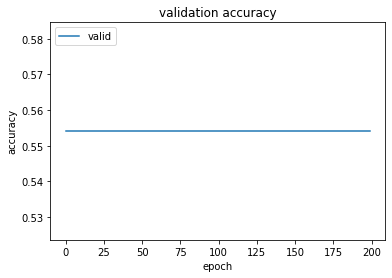

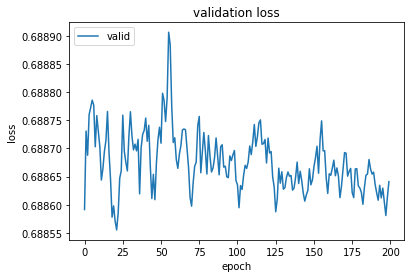

In [ ]:
import matplotlib.pyplot as plt

print(history_RMSprop.history.keys())
# summarize history for accuracy
plt.plot(history_RMSprop.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_RMSprop.history['val_loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['valid'], loc='upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Unrecognized location 'lower ight'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


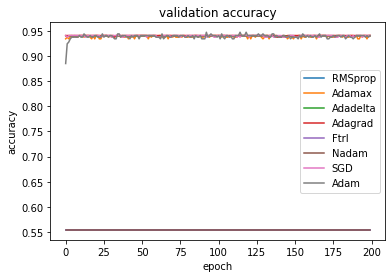

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Unrecognized location 'lower ight'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


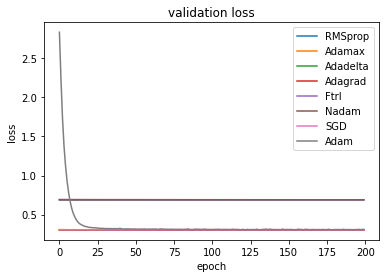

In [ ]:

# summarize history for accuracy
plt.plot(history_RMSprop.history['val_accuracy'])
plt.plot(history_Adamax.history['val_accuracy'])
plt.plot(history_Adadelta.history['val_accuracy'])
plt.plot(history_Adagrad.history['val_accuracy'])
plt.plot(history_Ftrl.history['val_accuracy'])
plt.plot(history_Nadam.history['val_accuracy'])
plt.plot(history_SGD.history['val_accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['RMSprop','Adamax','Adadelta','Adagrad','Ftrl','Nadam','SGD','Adam'], loc='lower ight')
plt.show()

# summarize history for loss
plt.plot(history_RMSprop.history['val_loss'])
plt.plot(history_Adamax.history['val_loss'])
plt.plot(history_Adadelta.history['val_loss'])
plt.plot(history_Adagrad.history['val_loss'])
plt.plot(history_Ftrl.history['val_loss'])
plt.plot(history_Nadam.history['val_loss'])
plt.plot(history_SGD.history['val_loss'])
plt.plot(history.history['val_loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['RMSprop','Adamax','Adadelta','Adagrad','Ftrl','Nadam','SGD','Adam'], loc='lower ight')
plt.show()

In [ ]:
#Grafiklere göre Adam, Adamax, SGD,Adadelta,Adagrad optimizasyon algoritmaları benzer doğruluk ve hata oranları verdiler.
#Bu oranlar doğruluk için yaklaşık 0.94 ve hata için yaklaşık 0.3 . Ftrl, Nadam, RMSprop  optimizasyon algoritmaları ise diğer değerlerden farklı
#ancak birbirlerine yakın değerler verdiler.  Bu değerler doğruluk için yaklaşık 0.55 ve hata için yaklaşık 0.68 . 
#Yani bu problem için ilk grup algoritmalar daha uygun çünkü daha yüksek doğruluk ve daha düşük hata değerleri verdiler.  